In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
df = pd.read_csv('gapminder.csv')
df.head()

,Unnamed: 0,country,year,population,cont,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
1,23,Albania,2007,3600523.0,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
3,47,Angola,2007,12420476.0,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927.0,Americas,75.320,12779.379640


.groupby()\
Groupby the continent 'cont'

In [17]:
cont_wise = df.groupby('cont')

Performs a sum() aggregate on the population per continent

In [18]:
cont_wise.population.sum()

cont
Africa      9.295397e+08
Americas    8.988712e+08
Asia        3.811954e+09
Europe      5.860985e+08
Oceania     2.454995e+07
Name: population, dtype: float64

.head() allows us to choose how many we want from the groupby, given the sort.\
e.g. .head(2) would show us two countries from each continent.\
Sorting by continent descending and then country ascending

In [19]:
cont_wise.head(2).sort_values(['cont', 'country'], ascending=[False, True])

,Unnamed: 0,country,year,population,cont,life_exp,gdp_cap
5,71,Australia,2007,20434176.0,Oceania,81.235,34435.367440
91,1103,New Zealand,2007,4115771.0,Oceania,80.204,25185.009110
1,23,Albania,2007,3600523.0,Europe,76.423,5937.029526
6,83,Austria,2007,8199783.0,Europe,79.829,36126.492700
0,11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
7,95,Bahrain,2007,708573.0,Asia,75.635,29796.048340
4,59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
11,143,Bolivia,2007,9119152.0,Americas,65.554,3822.137084
2,35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
3,47,Angola,2007,12420476.0,Africa,42.731,4797.231267


### Reshaping

* Long Format (Machine Format)
* Wide Format (Human Format)\

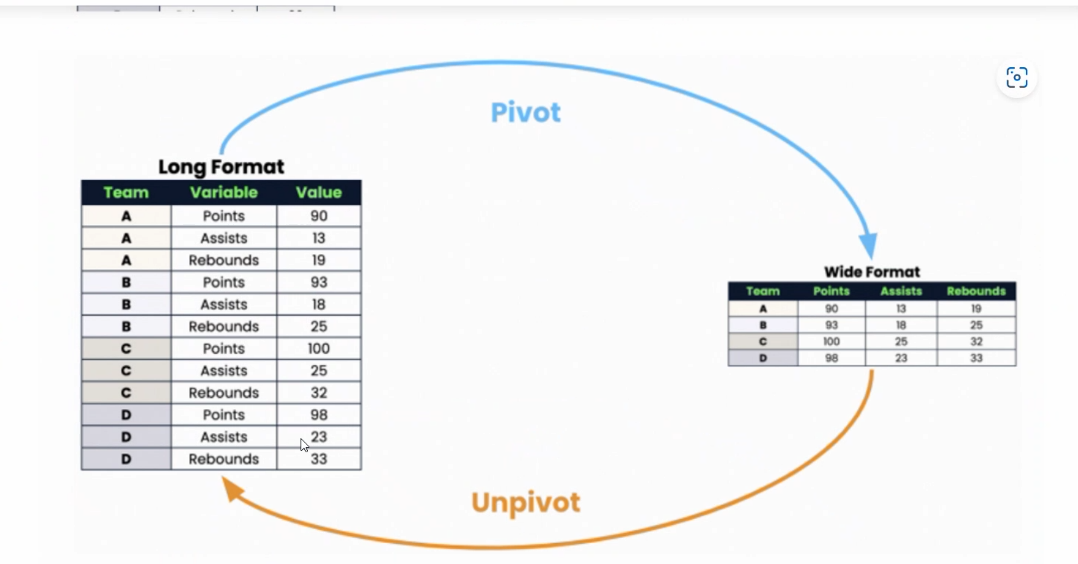

Loading sample data from seaborn package

In [21]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Grouping by year, calculating the total sum of passengers for each year

In [58]:
# fl_year = flights.groupby('year').passengers.sum()
# fl_year.loc[1949]

(flights.groupby('year').sum('passengers'))

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


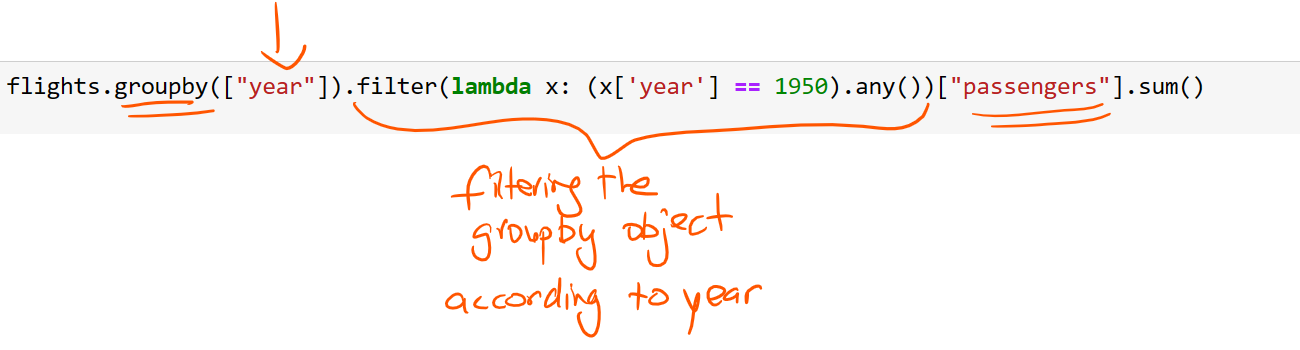

Multi Level Indexing\
The example below is grouping by year and then by month

In [41]:
fly=flights.groupby(["year","month"])[["passengers"]].sum()
fly

passengers
year month            
1949 Jan           112
     Feb           118
     Mar           132
     Apr           129
     May           121
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[144 rows x 1 columns]

### Pivot Table

Pivoting the flights dataframe, where the columns are months, content values are passengers

In [48]:
flights_pivoted = pd.pivot_table(
    flights, 
    values='passengers',
    index='year',
    columns='month',
    aggfunc=np.sum
    )

flights_pivoted

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [49]:
flights_piv = flights.pivot(
    index="year",
    columns="month",
    values="passengers",
    )

flights_piv

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


### Pivot_table documentation

In [50]:
df = pd.DataFrame({
    "A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
    "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
    "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"],
    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]
    })

df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


This first example aggregates values by taking the sum.

In [52]:
table = pd.pivot_table(
    df, 
    values='D', 
    index=['A', 'B'], 
    columns=['C'], 
    aggfunc=np.sum
    )
    
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

We can also fill missing values using the fill_value parameter.

In [53]:
table = pd.pivot_table(
    df, 
    values='D', 
    index=['A', 'B'], 
    columns=['C'], 
    aggfunc=np.sum, 
    fill_value=0
    )
    
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

The next example aggregates by taking the mean across multiple columns.

In [54]:
table = pd.pivot_table(
    df, 
    values=['D', 'E'], 
    index=['A', 'C'], 
    aggfunc={'D': np.mean, 'E': np.mean}
    )
    
table

D         E
A   C                        
bar large  5.500000  7.500000
    small  5.500000  8.500000
foo large  2.000000  4.500000
    small  2.333333  4.333333

We can also calculate multiple types of aggregations for any given value column.

In [55]:
table = pd.pivot_table(
    df, 
    values=['D', 'E'], 
    index=['A', 'C'], 
    aggfunc={'D': np.mean,'E': [min, max, np.mean]}
    )
    
table

D   E              
               mean max      mean min
A   C                                
bar large  5.500000   9  7.500000   6
    small  5.500000   9  8.500000   8
foo large  2.000000   5  4.500000   4
    small  2.333333   6  4.333333   2